In [10]:
import matplotlib.pyplot as plot
import pandas as pds
import pylab as pl
import numpy as np
%matplotlib inline

In [12]:
df= pds.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


In [13]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [25]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


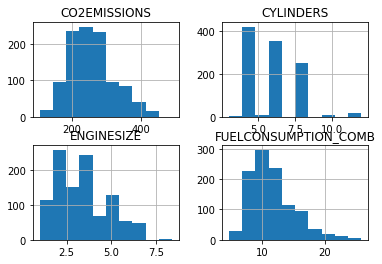

In [23]:
#PLOTING
viz =df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plot.show()

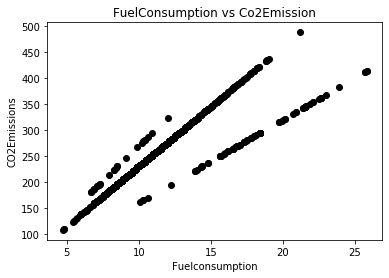

In [33]:
#PLOTING SCATTER
plot.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color="black")
plot.xlabel("Fuelconsumption")
plot.ylabel("CO2Emissions")
plot.title("FuelConsumption vs Co2Emission")
plot.show()

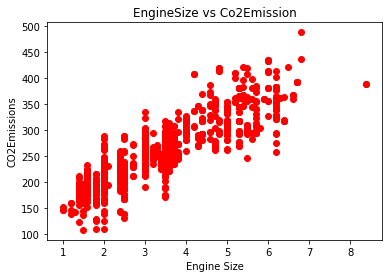

In [34]:
#PLOTING SCATTER
plot.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color="red")
plot.xlabel("Engine Size")
plot.ylabel("CO2Emissions")
plot.title("EngineSize vs Co2Emission")
plot.show()

In [42]:
#Train and TEST Data Set
#SPLIT INTO TRAIN AND TEST
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

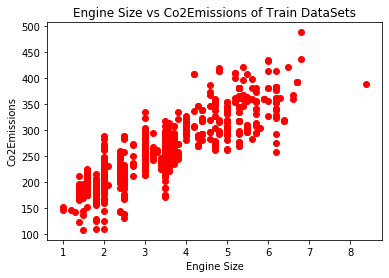

In [43]:
#TRAIN SET of TRAIN DATA (0.8)

plot.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="red")
plot.xlabel('Engine Size')
plot.ylabel('Co2Emissions')
plot.title('Engine Size vs Co2Emissions of Train DataSets')
plot.show()

In [50]:
#Modeling

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x,train_y)

print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[39.14236543]]
Intercept: [125.47508042]


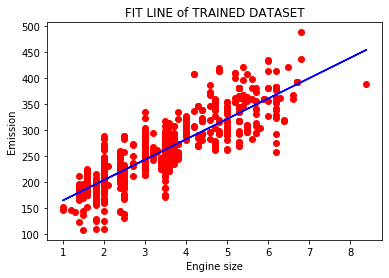

In [61]:
plot.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plot.plot(train_x,regr.coef_*train_x+regr.intercept_,'-b')
plot.xlabel("Engine size")
plot.ylabel("Emission")
plot.title("FIT LINE of TRAINED DATASET")
plot.show()

In [94]:
#EVALUATION
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error (MAE): %.3f" % np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of Squares - Mean Squared Error(MSE):%.2f"% np.mean((test_y_-test_y)**2))
a=r2_score(test_y_,test_y)
print("R2-Score: %.2f" % a)
print("Acheived %d Acuraccy"% (a*100))

Mean Absolute Error (MAE): 22.753
Residual sum of Squares - Mean Squared Error(MSE):872.76
R2-Score: 0.73
Acheived 73 Acuraccy


# 